<a href="https://colab.research.google.com/github/janani225/mnist-classification/blob/main/Untitled11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:

X_test.shape

(10000, 28, 28)

In [ ]:
single_image= X_train[0]


In [ ]:
single_image.shape

(28, 28)

In [ ]:
y_train.shape


(60000,)

In [ ]:
X_train.min()

0

In [ ]:
X_train.max()

255

In [ ]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [ ]:
X_train_scaled.min()

0.0

In [ ]:
X_train_scaled.max()

1.0

In [ ]:
y_train[0]

5

In [ ]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [ ]:
type(y_train_onehot)

numpy.ndarray

In [ ]:
y_train_onehot.shape

(60000, 10)

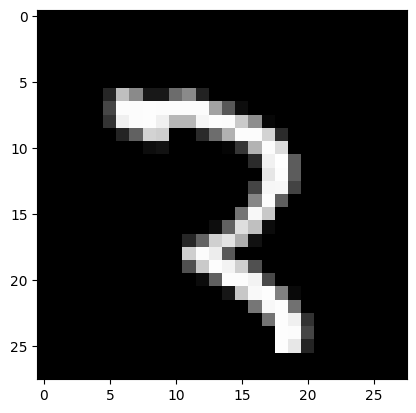

In [ ]:
single_image = X_train[500]
plt.imshow(single_image,cmap='gray')

In [ ]:
y_train_onehot[500]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)


In [ ]:
model = keras.Sequential()
model.add (layers. Input (shape=(28,28,1)))
model.add (layers. Conv2D (filters=32, kernel_size=(5,5), activation='relu'))
model.add (layers. MaxPool2D (pool_size=(2,2)))
model.add (layers. Flatten())
model.add (layers. Dense (32, activation='relu'))
model.add (layers. Dense (16, activation='relu'))
model.add (layers. Dense (8, activation='relu'))
model.add (layers. Dense (10, activation='softmax'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 32)                147488    
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                      

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [ ]:
model.fit(X_train_scaled,y_train_onehot,epochs=5,
          batch_size=64,
          validation_data=(X_test_scaled, y_test_onehot))

Epoch 1/5
938/938 [==============================] - 19s 18ms/step - loss: 0.5218 - accuracy: 0.8331 - val_loss: 0.1238 - val_accuracy: 0.9633
Epoch 2/5
938/938 [==============================] - 17s 18ms/step - loss: 0.0992 - accuracy: 0.9712 - val_loss: 0.0707 - val_accuracy: 0.9780
Epoch 3/5
938/938 [==============================] - 16s 17ms/step - loss: 0.0669 - accuracy: 0.9804 - val_loss: 0.0608 - val_accuracy: 0.9811
Epoch 4/5
938/938 [==============================] - 16s 17ms/step - loss: 0.0521 - accuracy: 0.9846 - val_loss: 0.0486 - val_accuracy: 0.9849
Epoch 5/5
938/938 [==============================] - 16s 17ms/step - loss: 0.0411 - accuracy: 0.9877 - val_loss: 0.0501 - val_accuracy: 0.9847


In [ ]:
metrics = pd.DataFrame(model.history.history)

In [ ]:
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.521803,0.833050,0.123789,0.9633
1,0.099152,0.971183,0.070665,0.9780
2,0.066914,0.980417,0.060812,0.9811
3,0.052087,0.984600,0.048611,0.9849
4,0.041115,0.987667,0.050050,0.9847


<Axes: >

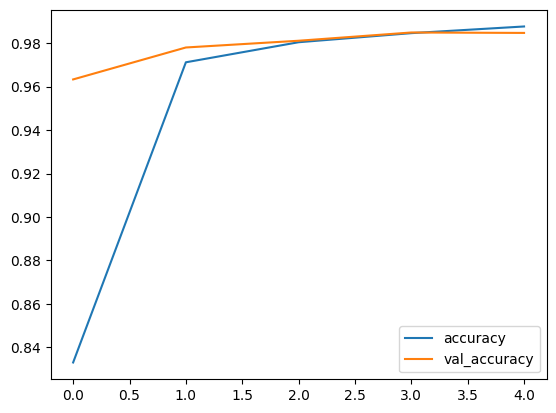

In [ ]:
metrics[['accuracy','val_accuracy']].plot()

<Axes: >

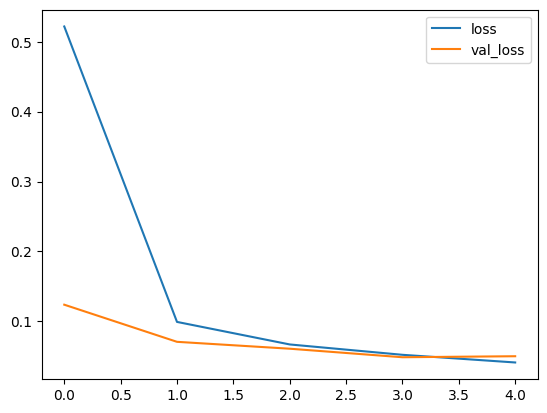

In [ ]:

metrics[['loss','val_loss']].plot()

In [ ]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)

313/313 [==============================] - 2s 6ms/step


In [ ]:
print(confusion_matrix(y_test,x_test_predictions))

[[ 969    1    2    0    2    0    3    1    2    0]
 [   0 1131    4    0    0    0    0    0    0    0]
 [   3    3 1018    0    3    0    0    5    0    0]
 [   0    0    2 1001    0    2    0    0    3    2]
 [   0    0    1    0  967    0    0    1    0   13]
 [   2    0    0   10    1  873    3    0    1    2]
 [  12    2    0    1    4    3  933    0    3    0]
 [   0    0    6    1    0    0    0 1015    1    5]
 [   4    1    4    2    2    1    1    5  945    9]
 [   1    4    0    0    5    1    0    3    0  995]]


In [ ]:
print(classification_report(y_test,x_test_predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.98      0.99       892
           6       0.99      0.97      0.98       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.97      0.98       974
           9       0.97      0.99      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [ ]:
img = image.load_img('deep.png')

In [ ]:
type(img)


PIL.JpegImagePlugin.JpegImageFile

In [ ]:
img = image.load_img('deep.png')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0

In [ ]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)


1/1 [==============================] - 0s 17ms/step


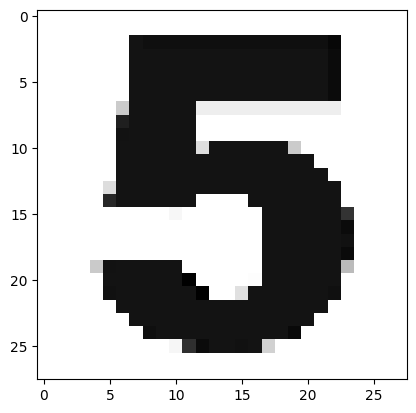

In [ ]:
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')

In [ ]:
img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0

In [ ]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 19ms/step


In [ ]:
print(x_single_prediction)

[5]
